In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import sys
import os
# import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("drive/Shareddrives/hurtos/")

In [ ]:
from APIevents.descriptions.utils_description import *

In [ ]:
sys.path.append("descriptions/")

In [ ]:
data=pd.read_csv("data_nueva_grilla_BOGOTA_200_.csv")

In [ ]:
data["fecha_crimen"]=pd.to_datetime(data["fecha_crimen"])

In [ ]:
data.head()

,fecha_crimen,FESTIVO,DIA_SEMANA,LONGITUD_X,LATITUD_Y,cantidad_crimenes
0,2018-01-01,1.0,1.0,-74.221581,4.62386,0.0
1,2018-01-01,1.0,1.0,-74.221581,4.62586,0.0
2,2018-01-01,1.0,1.0,-74.221581,4.62786,0.0
3,2018-01-01,1.0,1.0,-74.221581,4.62986,0.0
4,2018-01-01,1.0,1.0,-74.219581,4.61786,0.0


In [ ]:
fecha=data.groupby("fecha_crimen").agg({"cantidad_crimenes":"sum"}).reset_index()
line_figure(fecha,"fecha_crimen",frequency="cantidad_crimenes")

/content/drive/Shareddrives/hurtos/APIevents/descriptions/utils_description.py:122: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
fecha.describe()

,cantidad_crimenes
count,1247.000000
mean,83.163593
std,23.620030
min,8.000000
25%,69.000000
50%,85.000000
75%,98.000000
max,153.000000


In [ ]:
fecha["day"]=fecha.fecha_crimen.dt.day_name()

In [ ]:
fecha.fecha_crimen.min(),fecha.fecha_crimen.max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [ ]:
fecha=fecha[fecha.fecha_crimen<"2021-01-01"]

In [ ]:
weeks=int((fecha.fecha_crimen.max()-fecha.fecha_crimen.min()).days/7)
weeks

156

In [ ]:
dayweek=fecha.groupby("day").sum().reset_index()
dayweek.rename(columns={"cantidad_crimenes":"Frequency"},inplace=True)
bar_figure_probabilities(dayweek,"day",values_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],media_factor=weeks)

<ipython-input-16-c498d0367f36>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fecha["mes"]=fecha.fecha_crimen.dt.month_name()

In [ ]:
month=fecha.groupby("mes").sum().reset_index()
month.rename(columns={"cantidad_crimenes":"Frequency"},inplace=True)
bar_figure_probabilities(month,"mes",
                         values_order=["January","February","March","April","May","June","July","August","September","October","November","December"],
                         media_factor=weeks/52)

<ipython-input-18-a14783a44026>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fecha["anio"]=fecha.fecha_crimen.dt.year

In [ ]:
anio=fecha.groupby("anio").sum().reset_index()
anio.rename(columns={"cantidad_crimenes":"Frequency"},inplace=True)
anio["anio"]=anio["anio"].astype(str)
bar_figure_probabilities(anio,"anio",
                         values_order=["2018","2019","2020"],
                        media_factor=1)

<ipython-input-20-f13d561946ff>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
anio

,anio,Frequency,Percentage
0,2018,31208.0,34.369287
1,2019,33553.0,36.951829
2,2020,26041.0,28.678884


In [ ]:
localidades=gpd.read_file("poligonos-localidades.geojson")

In [ ]:
space=data.groupby(["LATITUD_Y","LONGITUD_X"]).agg({"cantidad_crimenes":sum}).reset_index()
space.rename(columns={"cantidad_crimenes":"Frecuencia"},inplace=True)
space

,LATITUD_Y,LONGITUD_X,Frecuencia
0,4.45986,-74.127581,4.0
1,4.45986,-74.125581,2.0
2,4.46186,-74.129581,0.0
3,4.46186,-74.127581,1.0
4,4.46186,-74.125581,0.0
...,...,...,...
8398,4.82586,-74.039581,0.0
8399,4.82586,-74.037581,0.0
8400,4.82786,-74.051581,0.0
8401,4.82786,-74.043581,0.0


In [ ]:
loca=refill_geo(space[["LONGITUD_X","LATITUD_Y"]].values,localidades,"Nombre de la localidad")

In [ ]:
space["Localidad"]=loca[:,0]

In [ ]:
space=space.groupby("Localidad").agg({"Frecuencia":sum}).reset_index()

In [ ]:
A=merge_geoNdata(localidades,"Nombre de la localidad",space,"Localidad")

In [ ]:
A[["Nombre de la localidad","Frecuencia"]].sort_values("Frecuencia")

,Nombre de la localidad,Frecuencia
10,CANDELARIA,1772.0
12,ANTONIO NARIÑO,1947.0
16,TUNJUELITO,2456.0
4,USME,2831.0
5,LOS MARTIRES,3258.0
14,SAN CRISTOBAL,3518.0
7,BARRIOS UNIDOS,3585.0
2,RAFAEL URIBE URIBE,4484.0
18,PUENTE ARANDA,4824.0
0,CIUDAD BOLIVAR,5213.0


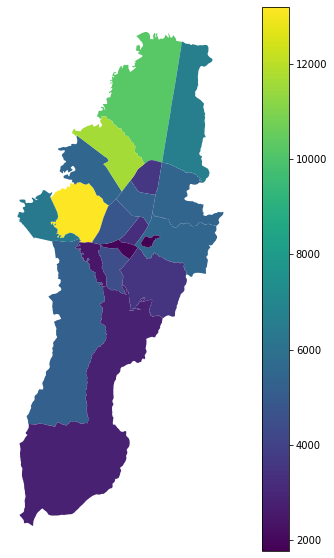

In [ ]:
map_polygons(A,"Frecuencia")

In [ ]:
map_polygons_html(A,"Localidad",col_vals="Frecuencia")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
day_mes=fecha.groupby(["day","mes"]).agg({"cantidad_crimenes":sum}).reset_index()

In [ ]:
bubbles_figure_probabilities(day_mes,"mes","day",frequency="cantidad_crimenes",
                             var1_order=["January","February","March","April","May","June","July","August","September","October","November","December"],
                             var2_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
                             )

In [ ]:
M=get_probabilities_matrices(day_mes,"mes","day",
                           var1_order=["January","February","March","April","May","June","July","August","September","October","November","December"],
                           var2_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
                           frequency="cantidad_crimenes")

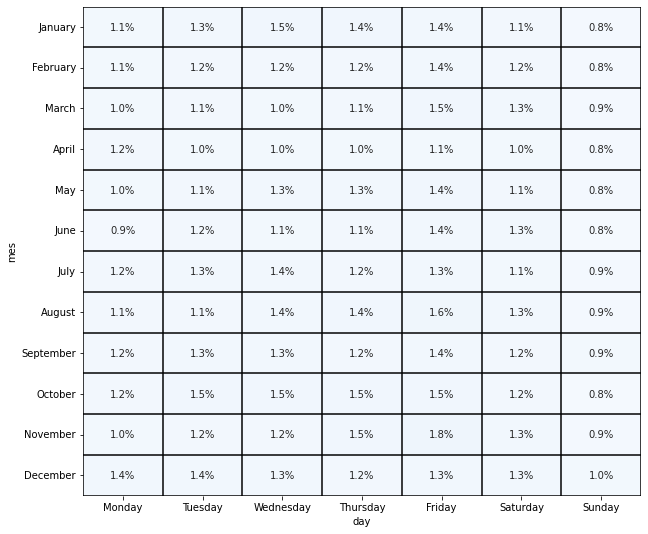

In [ ]:
heatmap_figure_probabilities(M[0],given='join')

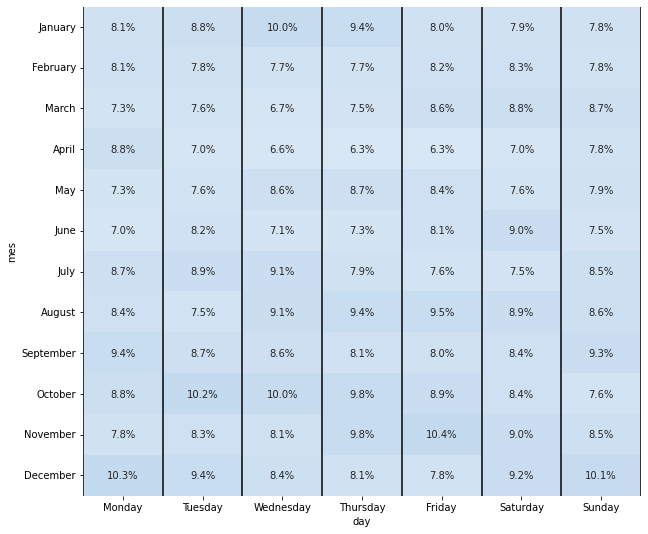

In [ ]:
heatmap_figure_probabilities(M[1],given='column')

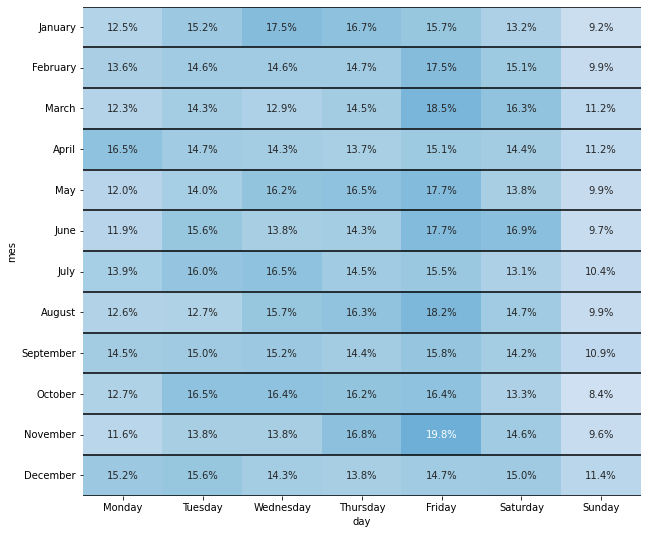

In [ ]:
heatmap_figure_probabilities(M[2],given='row')

In [ ]:
new=pd.DataFrame()
new["day"]=data.fecha_crimen.dt.day_name()
new["month"]=data.fecha_crimen.dt.month_name()
new["year"]=data.fecha_crimen.dt.year.astype(str)
new["LONGITUDE"]=data["LONGITUD_X"]
new["LATITUDE"]=data["LATITUD_Y"]
new["cantidad_crimenes"]=data["cantidad_crimenes"]

In [ ]:
new=new.groupby(["day","month","year","LONGITUDE","LATITUDE"]).sum().reset_index()

In [ ]:
new=new[new.cantidad_crimenes != 0].reset_index(drop=True)

In [ ]:
new["Localidad"]=refill_geo(new[["LONGITUDE","LATITUDE"]].values,localidades,"Nombre de la localidad")[:,0]

In [ ]:
new=new.groupby(["day","month","year","Localidad"]).agg({"cantidad_crimenes":sum}).reset_index()

In [ ]:
day_localidad=new.groupby(["day","Localidad"]).agg({"cantidad_crimenes":sum}).reset_index()

Monday


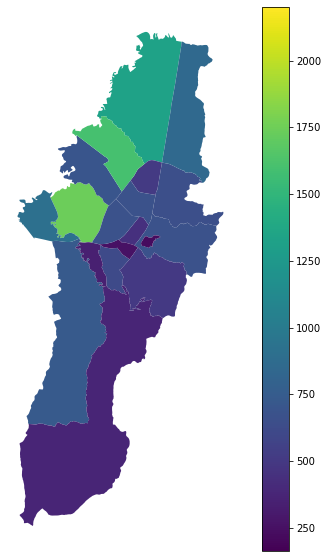

Tuesday


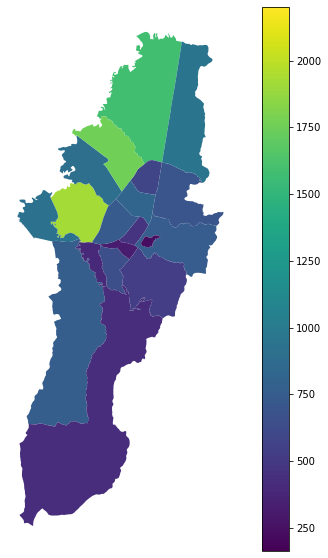

Wednesday


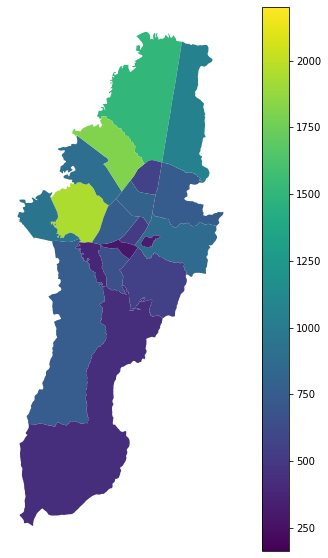

Thursday


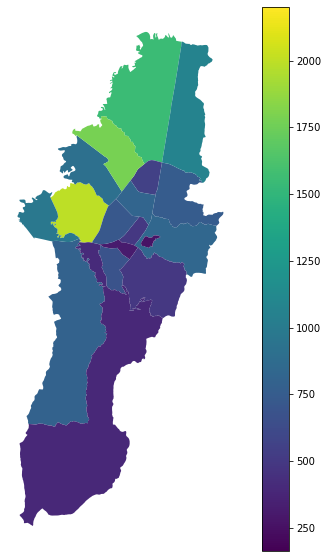

Friday


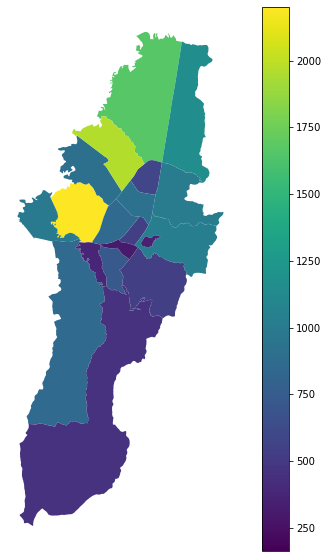

Saturday


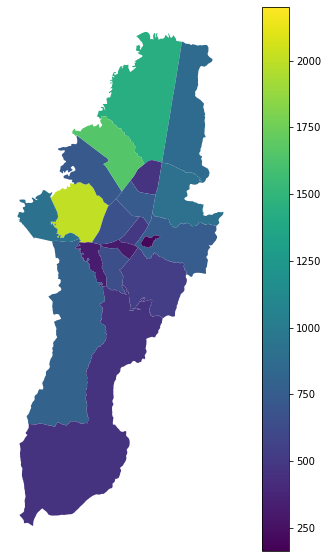

Sunday


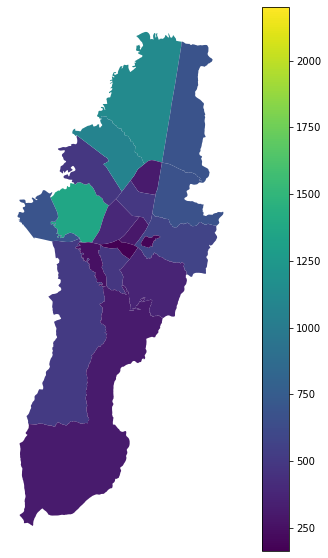

In [ ]:
for i in ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]:
    print(i)
    display(map_polygons(merge_geoNdata(localidades,
                                        "Nombre de la localidad",
                                        day_localidad[day_localidad.day==i],
                                        "Localidad"
                                        ),
                         "cantidad_crimenes",
                         vmin=day_localidad.cantidad_crimenes.min(),
                         vmax=day_localidad.cantidad_crimenes.max()))

In [ ]:
day_localidad

,day,Localidad,cantidad_crimenes
0,Friday,ANTONIO NARIÑO,303.0
1,Friday,BARRIOS UNIDOS,589.0
2,Friday,BOSA,995.0
3,Friday,CANDELARIA,347.0
4,Friday,CHAPINERO,1006.0
...,...,...,...
128,Wednesday,SUBA,1505.0
129,Wednesday,TEUSAQUILLO,793.0
130,Wednesday,TUNJUELITO,382.0
131,Wednesday,USAQUEN,1054.0


In [ ]:
M=get_probabilities_matrices(day_localidad,"Localidad","day",
                             var2_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
                             frequency="cantidad_crimenes")

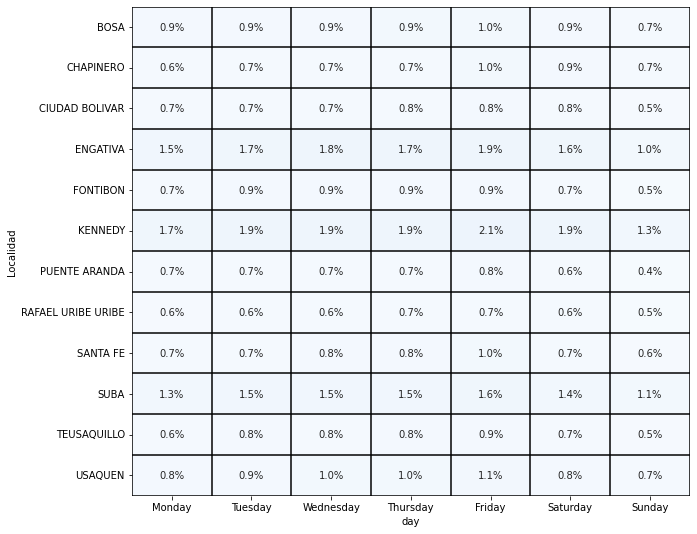

In [ ]:
heatmap_figure_probabilities(M[0],given='join')

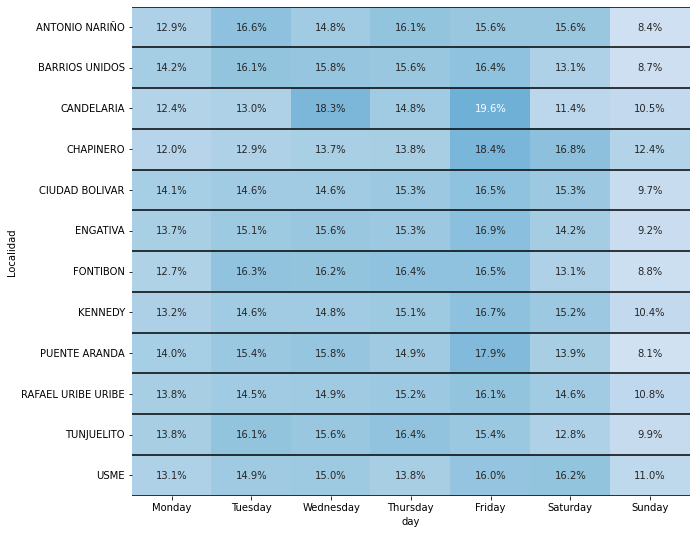

In [ ]:
heatmap_figure_probabilities(M[2],given='row')

In [ ]:
mes_anio=new.groupby(["month","year"]).agg({"cantidad_crimenes":sum}).reset_index()

In [ ]:
M=get_probabilities_matrices(mes_anio,"month","year",
                             var1_order=["January","February","March","April","May","June","July","August","September","October","November","December"],
                             var2_order=["2018","2019","2020","2021"],
                             frequency="cantidad_crimenes")

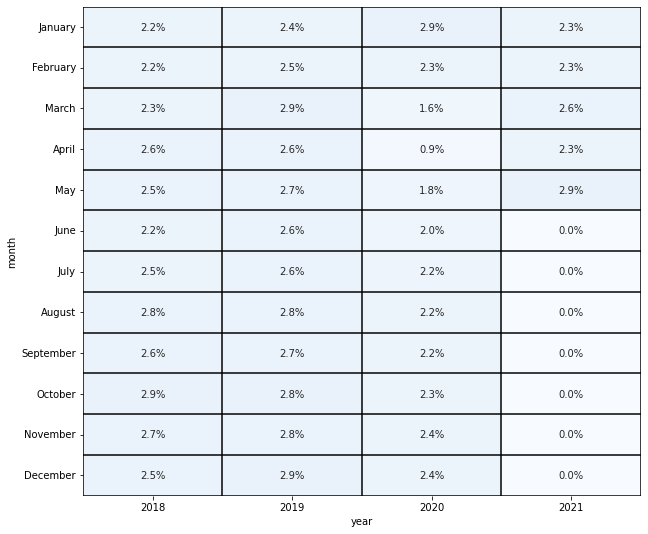

In [ ]:
heatmap_figure_probabilities(M[0],given='join')

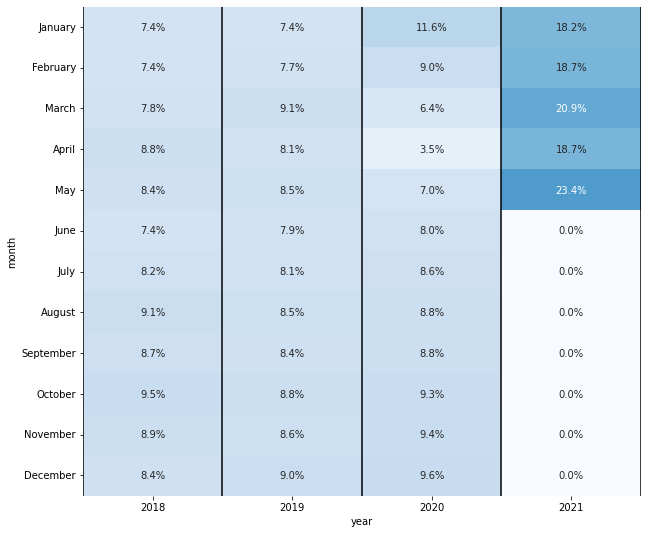

In [ ]:
heatmap_figure_probabilities(M[1],given='column')

In [ ]:
mes_localidad=new.groupby(["month","Localidad"]).agg({"cantidad_crimenes":sum}).reset_index()

January


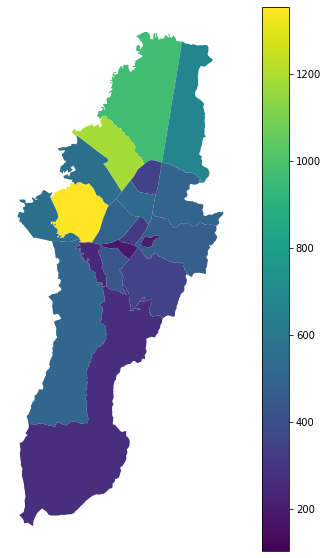

February


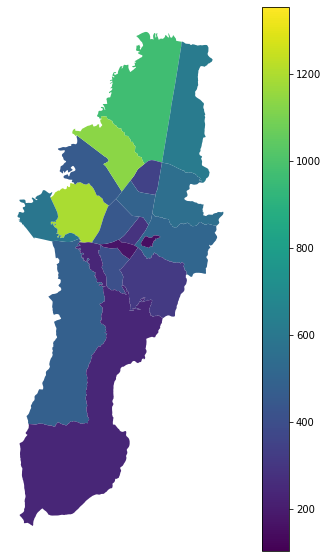

March


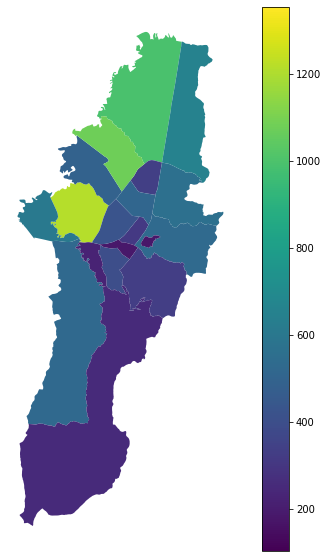

April


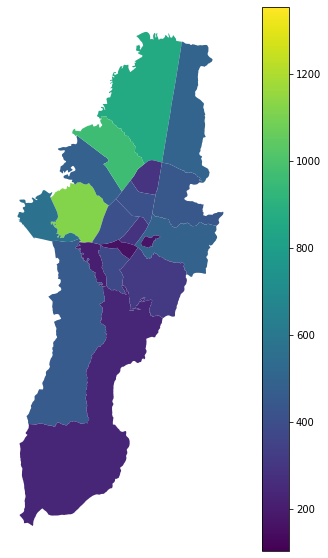

May


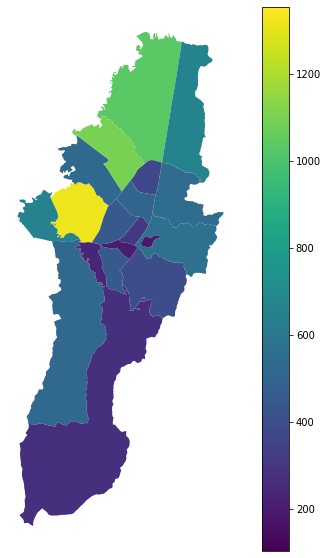

June


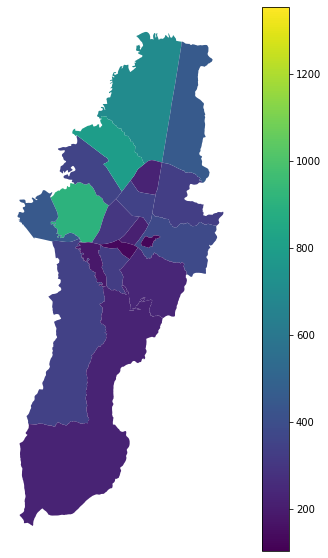

July


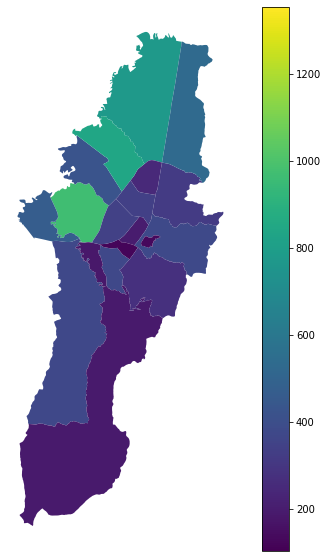

August


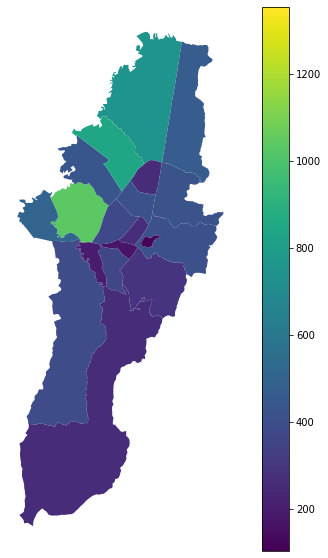

September


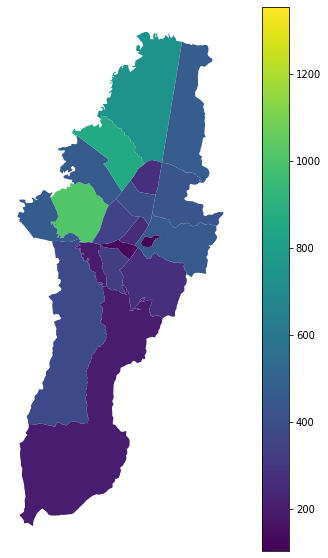

October


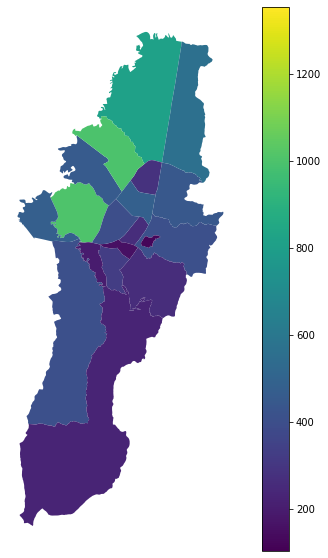

November


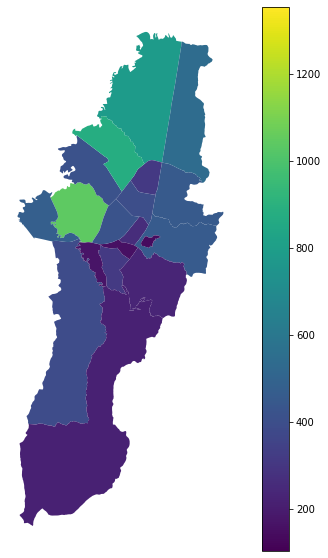

December


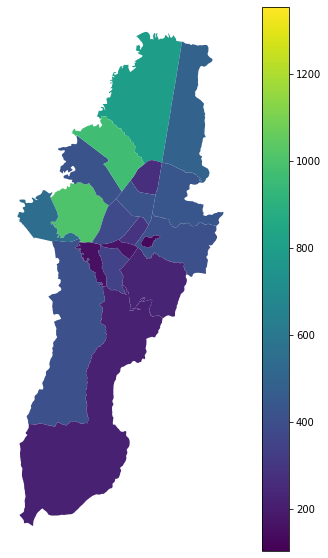

In [ ]:
for i in ["January","February","March","April","May","June","July","August","September","October","November","December"]:
    print(i)
    display(map_polygons(merge_geoNdata(localidades,
                                        "Nombre de la localidad",
                                        mes_localidad[mes_localidad.month==i],
                                        "Localidad"
                                        ),
                         "cantidad_crimenes",
                         vmin=mes_localidad.cantidad_crimenes.min(),
                         vmax=mes_localidad.cantidad_crimenes.max()))

In [ ]:
M=get_probabilities_matrices(mes_localidad,"month","Localidad",
                             var1_order=["January","February","March","April","May","June","July","August","September","October","November","December"],
                             frequency="cantidad_crimenes")

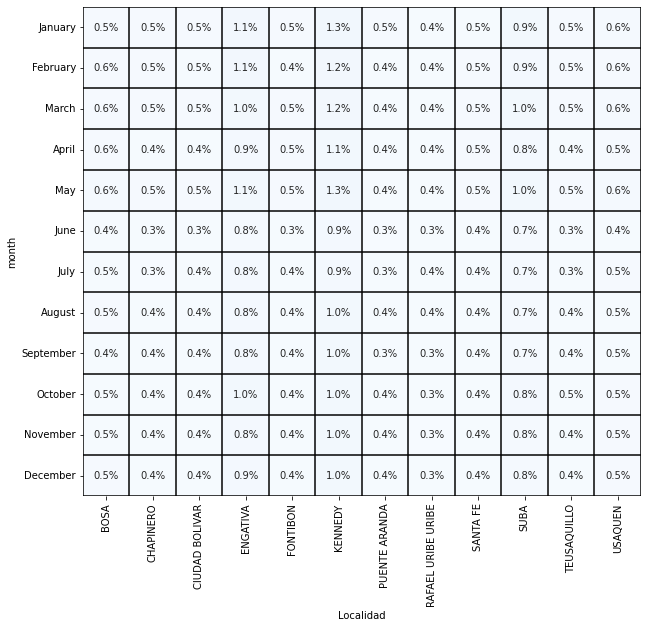

In [ ]:
heatmap_figure_probabilities(M[0],given='join')

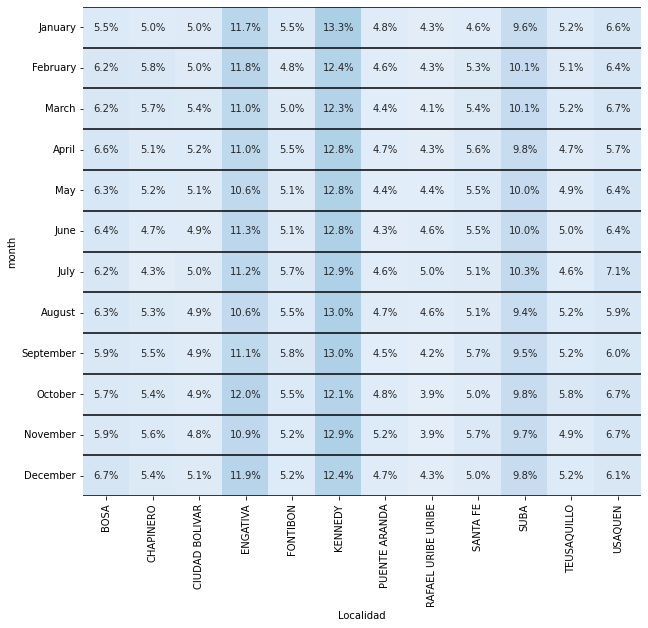

In [ ]:
heatmap_figure_probabilities(M[2],given='row')

In [ ]:
anio_localidad=new.groupby(["year","Localidad"]).agg({"cantidad_crimenes":sum}).reset_index()

2018


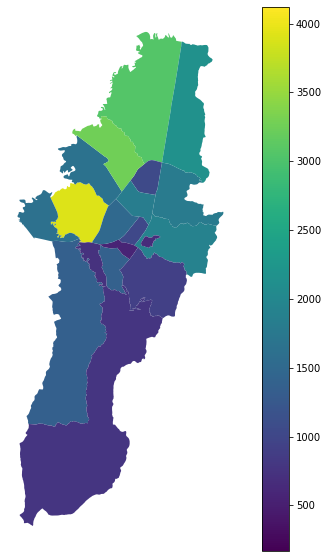

2019


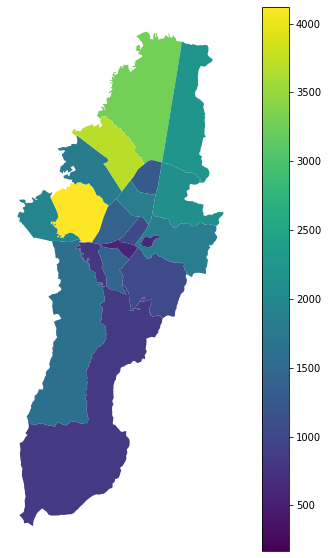

2020


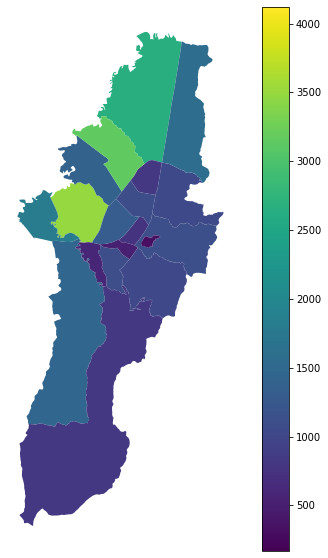

In [ ]:
for i in ["2018","2019","2020"]:
    print(i)
    display(map_polygons(merge_geoNdata(localidades,
                                        "Nombre de la localidad",
                                        anio_localidad[anio_localidad.year==i],
                                        "Localidad"
                                        ),
                         "cantidad_crimenes",
                         vmin=anio_localidad.cantidad_crimenes.min(),
                         vmax=anio_localidad.cantidad_crimenes.max()))

In [ ]:
M=get_probabilities_matrices(anio_localidad,"Localidad","year",
                             var2_order=["2018","2019","2020"],
                             frequency="cantidad_crimenes")

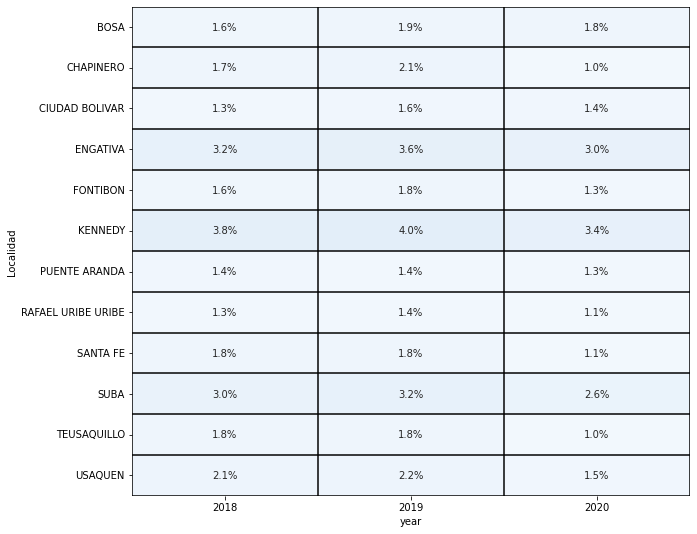

In [ ]:
heatmap_figure_probabilities(M[0],given='join')

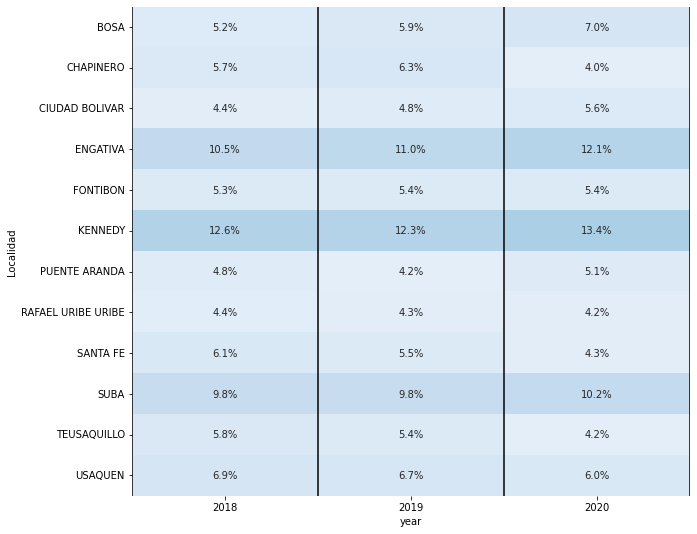

In [ ]:
heatmap_figure_probabilities(M[1],given='column')